# Dacon Cup 2020
> Analyze and predict user pattern by using user data

# Table of Contents
1. [Problem Definition & Domain Research](#ProblemDefinition&DomainResearch)  
    1.1 [Problem Definiton](#problemdefinition)  
    1.2 [Data](#data)  
2. [Acquire training and testig data : Data Loading](#dataloading)  
    2.1 [Package Loading & Basic Setting](#package)  
    2.2 [Data Loading](#loading)  
3. [Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)](#EDA&Wrangling)  
    3.1 [Analyze by describing data (Quick-view)¶](#quick)  
    3.2 [Analyze by visualizing data](#visual)  
4. [Modeling, Predict and Solve the problem](#modeling)  
    4.1 [Listing possible model](#modellisting)  
    4.2 [Modeling](#predicting)  

# 1. Problem Definition & Domain Research<a name="ProblemDefinition&DomainResearch"></a>
## 1.1 Problem Definiton<a name="problemdefinition"></a>
### 1.1.1 Topic
- 과거의 데이콘 데이터를 활용한 미래의 사용자 행동 패턴을 예측

### 1.1.2 Background
- 전체 회원 약 2만명, 약 3만 회의 대회 참여, 47개의 공식 대회 개최, 총 상금 3억 7천만원이라는 국내 최대 규모의 인공지능 컴피티션 플랫폼데이콘입니다.
- 2020년 한 해를 마무리하며 데이콘의 사용자 행동 데이터를 바탕으로 하는 대회를 주최합니다.

### 1.1.3 Purpose 
- 지난 2년 동안의 데이콘에 관한 여러가지 데이터가 주어집니다. 이 데이터를 통해서 사용자 움직임을 예측하고자 합니다.
- 2018.09.09 ~ 2020.12.08 기간의 데이터로 이후 30일 간의 데이터 예측

### 1.1.4 Host  
- Dacon

## 1.2 Data<a name="data"></a>
### 1.2.1 Dictionary
- 2018.09.09 ~ 2020.12.08 기간동안 기록된 한시간 간격의 사용자 행동 데이터
    - 사용자 수 : 
    - 세션 수 : 모든 사용자가 시작한 개별 세션 수
      - 사용자가 사이트를 방문한 후 30분 이상 어떤 작업도 수행하지 않은 경우 이후에 발생한 모든 작업은 새로운 세션으로 간주
      - 사용자가 사이트를 떠났다가 30분 내에 다시 방문하면 해당 방문은 원래 세션의 일부로 기록
      - 언제든지 최초 세션의 방문자는 새로운 세션 및 새로운 사용자로 간주
      - 이 기간에 동일한 사용자가 추가로 발생시키는 세션은 추가 세션으로 집계되지만, 추가 사용자로는 집계되지 않음
    - 신규 방문자 수
    - 페이지 뷰 수

# 2. Acquire training and testig data : Data Loading¶<a name="dataloading"></a>
## 2.1 Package Loading & Basic Setting<a name="package"></a>

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import statsmodels.api as sm #arima model
import warnings
warnings.filterwarnings('ignore')

In [354]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방(https://kiddwannabe.blog.me)
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

## 2.2 Data Loading<a name="loading"></a>
- 여러 데이터셋이 있으나, 핵심인 모델에 넣을 train, 2차_train 데이터셋만 로딩
- 시각화를 통한 데이터 파악을 위해 두 개의 데이터 결합

In [355]:
# directory set
import os
os.chdir("/Users/harryjeong/DA/Project/dacon_cup2020")

# read data by glob
import glob

path = "./data/*.csv"
flist = glob.glob(path)
flist = sorted(flist)
flist

['./data/2차_train.csv',
 './data/info_competition.csv',
 './data/info_login.csv',
 './data/info_submission.csv',
 './data/info_user.csv',
 './data/new_competition_info.csv',
 './data/new_login_info.csv',
 './data/new_submission_info.csv',
 './data/new_user_info.csv',
 './data/submission.csv',
 './data/train.csv']

In [356]:
train_old = pd.read_csv(flist[-1], encoding = 'euc-kr')
train_new = pd.read_csv(flist[0], encoding = 'euc-kr')

In [357]:
# 2018.09.09 ~ 2020.11.08까지의 데이터
train_old.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [358]:
# 2020.11.09 ~ 2020.12.08까지의 데이터
train_new.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09 00:00:00,134,147,33,4082
1,2020-11-09 01:00:00,88,77,22,2444
2,2020-11-09 02:00:00,54,48,12,1148
3,2020-11-09 03:00:00,35,31,3,557
4,2020-11-09 04:00:00,31,34,7,711


In [359]:
# 위 2개의 데이터 결합 및 훑어보기
train = train_old.append(train_new)
train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


# 3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)<a name="EDA&Wrangling"></a>
## 3.1 Analyze by describing data (Quick-view)¶<a name="quick"></a>
### 3.1.1 Check columns (name)

In [212]:
train.columns.values

array(['DateTime', '사용자', '세션', '신규방문자', '페이지뷰'], dtype=object)

### 3.1.2 Check feature type
1) Categorical
- Categorical
- Ordinal  

2) Numerical
- Continous : 사용자, 세션, 신규방문자, 페이지뷰
- Discrete

### 3.1.3 Check blank, null or empty values & data types
- integer or floats or strings(objects)  
    df.info()
- no NULL
- **DateTime은 datetime으로 변경해주기**

In [360]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19728 entries, 0 to 719
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19728 non-null  object
 1   사용자       19728 non-null  int64 
 2   세션        19728 non-null  int64 
 3   신규방문자     19728 non-null  int64 
 4   페이지뷰      19728 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 924.8+ KB


### 3.1.4 Check distribution of numerical feature values
    df.describe()


In [361]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
사용자,19728.0,49.113088,59.424601,0.0,9.0,22.0,75.0,668.0
세션,19728.0,48.658354,58.680017,0.0,9.0,23.0,74.0,815.0
신규방문자,19728.0,11.975872,16.013593,0.0,2.0,6.0,16.0,335.0
페이지뷰,19728.0,1096.980586,1686.486895,0.0,74.0,296.0,1456.0,27884.0


## 3.2 Analyze by visualizing data<a name="visual"></a>
>Confirming some of our assumptions using visualizations for analyzing the data.

### Summary
- 사용자, 세션, 신규방문자, 페이지뷰는 어느정도 차이가 있긴하지만 비슷한 추세를 보임을 확인
- 2019년 10, 11월 기점으로 빠르게 그래프가 우상향
- 2019년 12월에 주춤, 2020년 8월에 대폭 상승하는 모습을 보여줌
    - 연말 여파로 잠시 줄어들었다가 1월에 새해 마음가짐으로 인해 다시 상승하는 것으로 예상됨
    - 학생들이 많을 것으로 예상되는 플랫폼이므로 방학인 8월에 상승하는 모습을 보이지 않을까 예상됨
- 모든 컬럼이 아주 강한 상관관계를 가지고 있음

In [362]:
# 일자별 시각화를 위한 리샘플링
train['DateTime'] = pd.to_datetime(train.DateTime)
date_time = pd.to_datetime(train.DateTime)
train['date'] = train.DateTime.dt.date
train = train.groupby(train['date']).sum().reset_index()

In [365]:
train.shape

(822, 5)

In [366]:
train_graph = train.set_index('date')

### 시계열 선 그래프
- 사용자, 세션, 신규방문자, 페이지뷰는 어느정도 차이가 있긴하지만 비슷한 추세를 보임을 확인
- 2019년 10, 11월 기점으로 빠르게 그래프가 우상향
- 2019년 12월에 주춤, 2020년 8월에 대폭 상승하는 모습을 보여줌
    - 연말 여파로 잠시 줄어들었다가 1월에 새해 마음가짐으로 인해 다시 상승하는 것으로 예상됨
    - 학생들이 많을 것으로 예상되는 플랫폼이므로 방학인 8월에 상승하는 모습을 보이지 않을까 예상됨

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

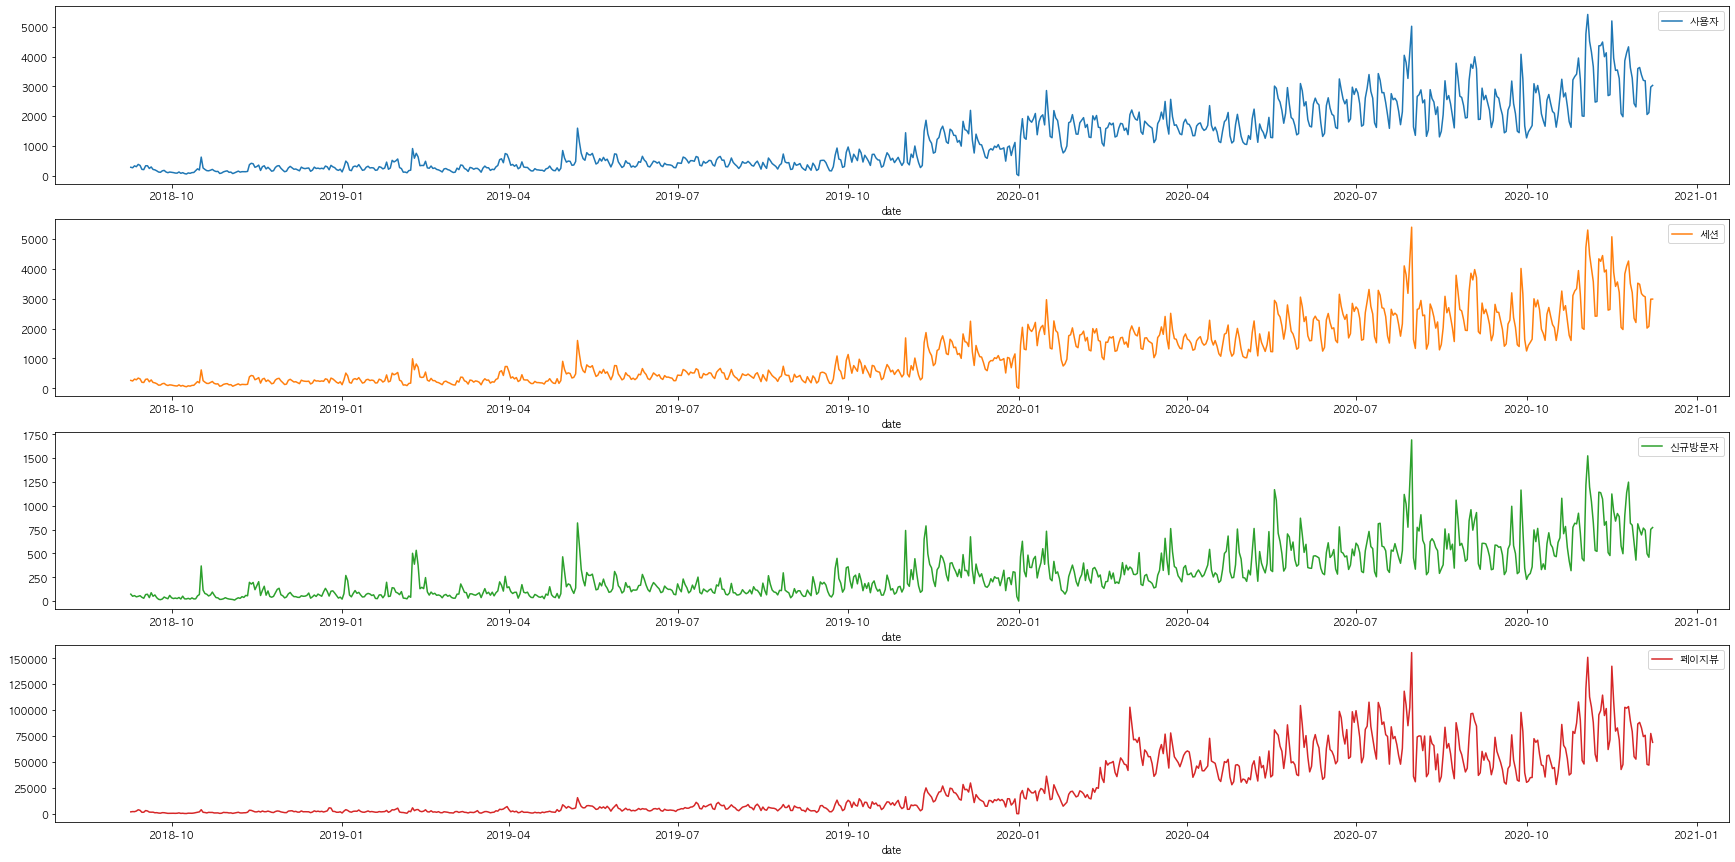

In [367]:
figure, ax = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(30, 15)
train_graph.plot(subplots = True, ax = ax)

### Heatmap
>Check correlation btw human features

- 모든 컬럼 간에 아주 강한 상관관계를 보임

<AxesSubplot:>

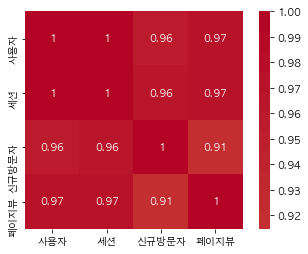

In [368]:
import seaborn as sns
correlations = train_graph.corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", annot = True, square=True, center=0)

# 4. Modeling, Predict and Solve the problem<a name="modeling"></a>

## 4.1 Listing possible model<a name="modellisting"></a>
- 아래 2가지 모델을 중심으로 문제를 해결해보고자 한다.
    - Prophet
    - Sarimax

## 4.2 Modeling<a name="predicting"></a>
### 4.2.1 Modeling & Tuning & Fold

### 1) Prophet
- train_old 학습으로 train_new(test data)를 예측
- 공휴일 추가
    - 법정 공휴일 추가
    - 법정 공휴일 전일도 추가
    - 대회시작일, 종료일이 큰 이벤트였을 것으로 판단하여 추가

In [370]:
# 리샘플링
train_old['DateTime'] = pd.to_datetime(train_old.DateTime)
date_time = pd.to_datetime(train_old.DateTime)
train_old['date'] = train_old.DateTime.dt.date
train_old = train_old.groupby(train_old['date']).sum().reset_index()

In [371]:
# 리샘플링
train_new['DateTime'] = pd.to_datetime(train_new.DateTime)
date_time = pd.to_datetime(train_new.DateTime)
train_new['date'] = train_new.DateTime.dt.date
train_new = train_new.groupby(train_new['date']).sum().reset_index()
train_new = train_new.iloc[:, 1:]

### Holiday 추가
- 법정 공휴일, 법정 공휴일 전일, 대회시작일, 대회마감일

In [372]:
# 법정 공휴일
legal_holiday = pd.DataFrame({
'holiday': 'holiday',
'ds': pd.to_datetime(['2018-09-23',
                         '2018-09-24',
                         '2018-09-25',
                         '2018-09-26',
                         '2018-10-03',
                         '2018-10-09',
                         '2018-12-25',
                         '2019-01-01',
                         '2019-02-04',
                         '2019-02-05',
                         '2019-02-06',
                         '2019-03-01',
                         '2019-05-05',
                         '2019-05-06',
                         '2019-05-12',
                         '2019-06-06',
                         '2019-08-15',
                         '2019-09-12',
                         '2019-09-13',
                         '2019-09-14',
                         '2019-10-03',
                         '2019-10-09',
                         '2019-12-25',
                         '2020-01-01',
                         '2020-01-24',
                         '2020-01-25',
                         '2020-01-26',
                         '2020-01-27',
                         '2020-03-01',
                         '2020-05-05',
                         '2020-04-15',
                         '2020-04-30',
                         '2020-06-06',
                         '2020-08-15',
                         '2020-09-30',
                         '2020-10-01',
                         '2020-10-02',
                         '2020-10-03',
                         '2020-10-09',
                         '2020-12-25',
                         '2021-01-01'])
})

In [399]:
# 법정 공휴일 전일
from datetime import timedelta
legal_pre_holiday = pd.DataFrame({
'holiday': 'preholiday', 'ds' : legal_holiday.ds - timedelta(days = 1)})
legal_pre_holiday

,holiday,ds
0,preholiday,2018-09-22
1,preholiday,2018-09-23
2,preholiday,2018-09-24
3,preholiday,2018-09-25
4,preholiday,2018-10-02
5,preholiday,2018-10-08
6,preholiday,2018-12-24
7,preholiday,2018-12-31
8,preholiday,2019-02-03
9,preholiday,2019-02-04


In [373]:
# 대회 시작일
period_start = pd.DataFrame({
    'holiday': 'period_start',
    'ds': pd.to_datetime(['2018-08-14',
 '2018-09-15',
 '2018-10-18',
 '2018-11-13',
 '2018-12-25',
 '2019-02-08',
 '2019-03-26',
 '2019-05-06',
 '2019-07-11',
 '2019-10-01',
 '2019-11-11',
 '2019-11-21',
 '2019-11-20',
 '2019-02-05',
 '2020-01-16',
 '2020-01-02',
 '2020-02-01',
 '2020-03-01',
 '2020-10-20',
 '2020-03-29',
 '2020-04-01',
 '2020-05-01',
 '2020-05-15',
 '2020-06-01',
 '2020-06-22',
 '2020-06-25',
 '2020-07-01',
 '2020-07-14',
 '2020-08-17',
 '2020-08-03',
 '2020-09-01',
 '2020-09-23',
 '2020-10-05',
 '2020-09-28',
 '2020-10-19',
 '2020-11-23',
 '2020-10-29',
 '2020-11-11',
 '2020-11-02',
 '2020-11-24',
 '2020-12-09',
 '2020-12-14',
 '2020-12-18',
 '2021-01-06'])
  })

In [374]:
# 대회 종료일
period_end = pd.DataFrame({
'holiday': 'period_end',
'ds': pd.to_datetime(['2018-09-13',
 '2018-10-13',
 '2018-12-31',
 '2019-01-31',
 '2019-01-10',
 '2019-07-18',
 '2019-05-20',
 '2019-07-08',
 '2019-10-21',
 '2019-10-27',
 '2019-12-06',
 '2020-01-12',
 '2020-03-20',
 '2019-07-19',
 '2020-02-12',
 '2020-02-02',
 '2020-02-29',
 '2020-04-15',
 '2020-04-13',
 '2020-11-16',
 '2020-05-10',
 '2020-05-25',
 '2020-06-26',
 '2020-06-30',
 '2020-07-10',
 '2020-07-31',
 '2020-08-14',
 '2020-09-04',
 '2020-09-29',
 '2020-09-14',
 '2020-10-09',
 '2020-10-30',
 '2020-11-13',
 '2020-11-19',
 '2020-12-31',
 '2020-12-04',
 '2020-12-09',
 '2020-11-20',
 '2020-12-28',
 '2021-01-26',
 '2020-12-27',
 '2021-01-22',
 '2021-02-03']),
})

In [410]:
# 모델의 holidays 파라미터에 할당할 df 생성
holidays = pd.concat((legal_holiday, period_start, period_end, legal_pre_holiday))
holidays.sort_values(by = 'ds')

,holiday,ds
0,period_start,2018-08-14
0,period_end,2018-09-13
1,period_start,2018-09-15
0,preholiday,2018-09-22
1,preholiday,2018-09-23
...,...,...
40,holiday,2021-01-01
43,period_start,2021-01-06
41,period_end,2021-01-22
39,period_end,2021-01-26


### Parameter Tuning & Cross Validation
- for문으로 최적의 파라미터 탐색
- 대회평가방식인 rmse 사용
- prophet 내 cross validation 사용
    - best rmse score(in cross_val):  159.65631840326202
    - 최적의 파라미터:  {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.015, 'holidays_prior_scale': 3}

In [411]:
# for문으로 최적의 파라미터 탐색
from tqdm.notebook import tqdm
results = []
sub_pro = pd.DataFrame()

best_score = 5000

for changepoint_prior_scale in tqdm([0.005, 0.008, 0.01, 0.013, 0.015]):
    for seasonality_prior_scale in [0.005, 0.008, 0.01, 0.013, 0.015]:
        for holidays_prior_scale in [0.08, 1, 3, 5]:
            for col in train_old.columns[1:5]:
                df=train_old[['date',col]]
                df=df.rename(columns = {'date': 'ds',col: 'y'})
                my_model = Prophet(changepoint_prior_scale=changepoint_prior_scale,
                                   seasonality_prior_scale=seasonality_prior_scale,
                                   holidays = holidays, holidays_prior_scale=holidays_prior_scale,
                                   weekly_seasonality=20, daily_seasonality = False, seasonality_mode='multiplicative')
                my_model.fit(df)
                
                # 교차 검증 적용
                df_cv = cross_validation(my_model, horizon = '30 days', initial = '731 days', period = '30 days')
                df_p = performance_metrics(df_cv)
                # 교차 검증 rmse 평균을 계산
                score = df_p['rmse'].mean()
                # rmse가 best_score보다 낮으면, 매개변수와 함께 기록
                if score < best_score :
                    best_score = score
                    best_parameters = {'changepoint_prior_scale' : changepoint_prior_scale,
                                       'seasonality_prior_scale':seasonality_prior_scale,
                                       'holidays_prior_scale':holidays_prior_scale}
print('best rmse score(in cross_val): ', best_score)
print('최적의 파라미터: ', best_parameters)                

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-09 00:00:00 and 2020-10-09 00:00:00




best rmse score(in cross_val):  159.65631840326202
최적의 매개변수:  {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.015, 'holidays_prior_scale': 3}


### Model Fitting 및 시각화
- 최적의 파라미터로 모델을 학습시킴 (향후 30일 예측)
- 피팅된 컴포넌트를 시각화
    - 예측 : 예측을 벗어나는 데이터도 있으나, 전반적으로 잘 잡아준 모습
    - 트렌드 : 시작점부터 점점 증가하는 추세, 2019년 8-9월부터 가파르게 상승하는 경향
    - 주별 : 주 초에 데이터가 많이 몰리고, 주말에는 급격하게 감소하는 모습 (주말에는 활동이 적음)
    - 연별 : 연초에 증가, 연말에 감소하며 방학게 증가하고 학기 중에 감소하는 추세를 보여줌
        - 단, 페이지뷰의 경우 연초에만 조금 다른 추세를 보여줌. 연초에 사용자/세션/신규방문자가 늘어난 이후에 늘어나는 경향

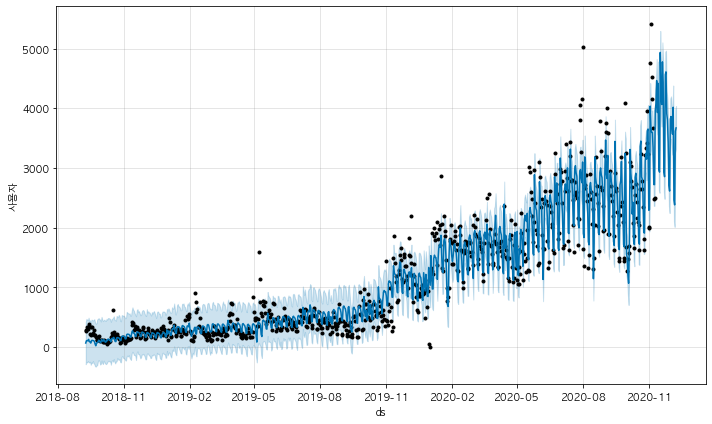

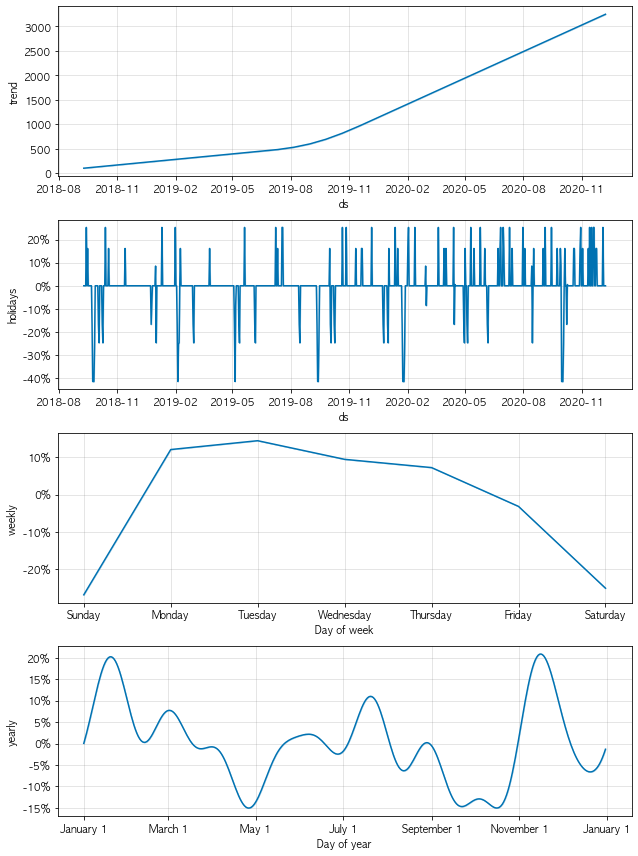

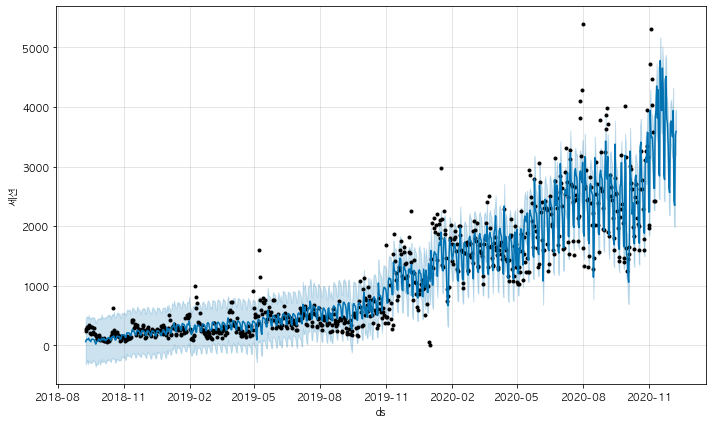

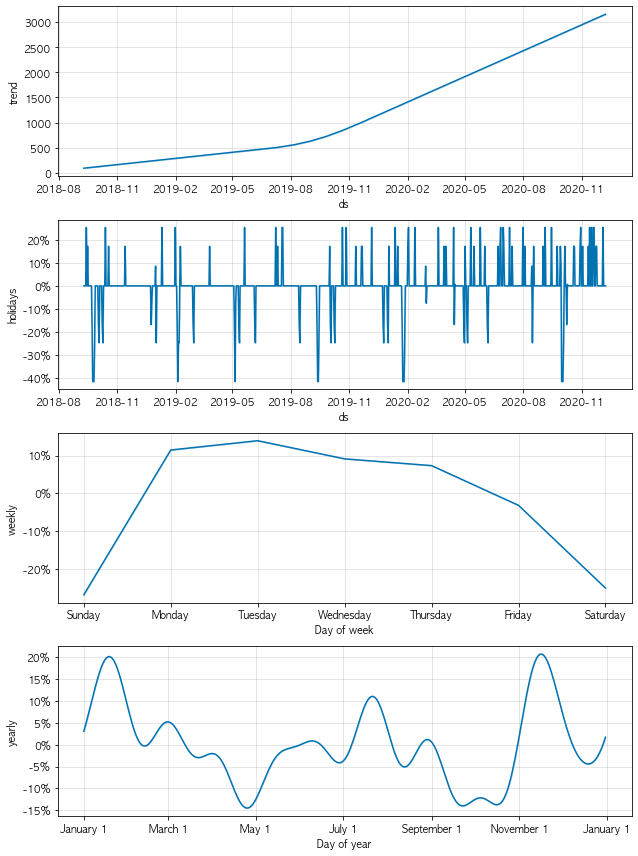

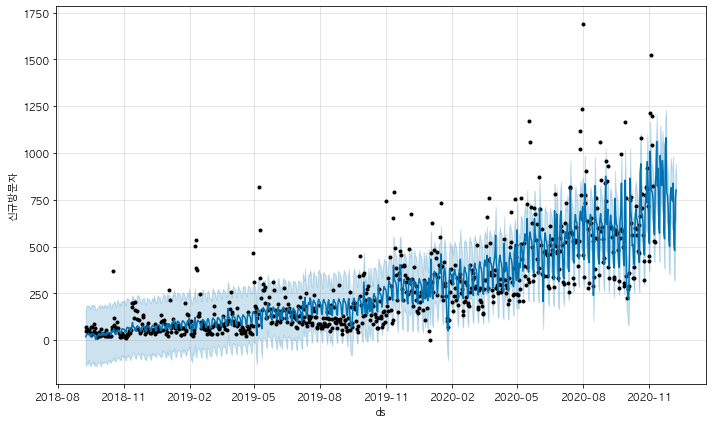

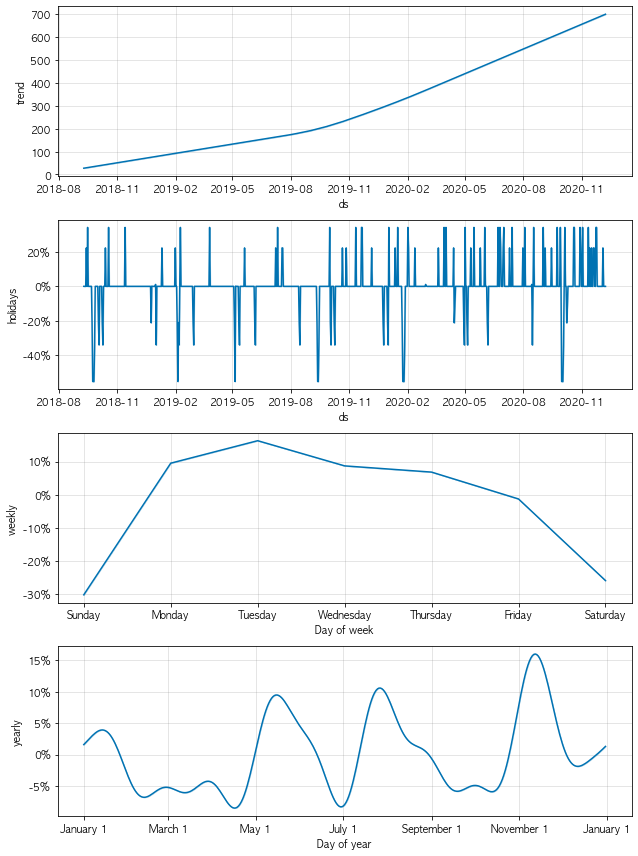

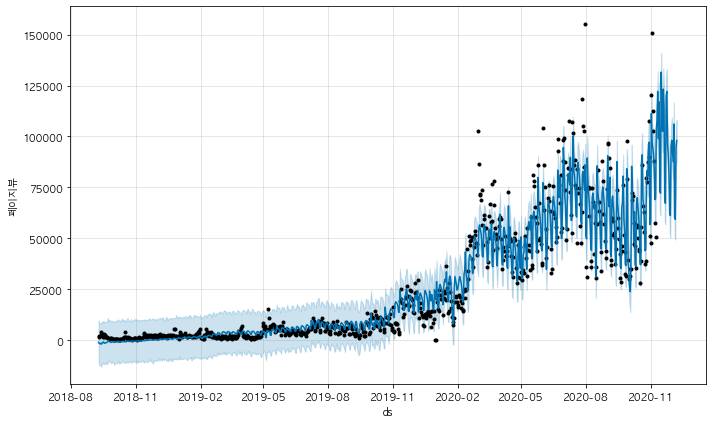

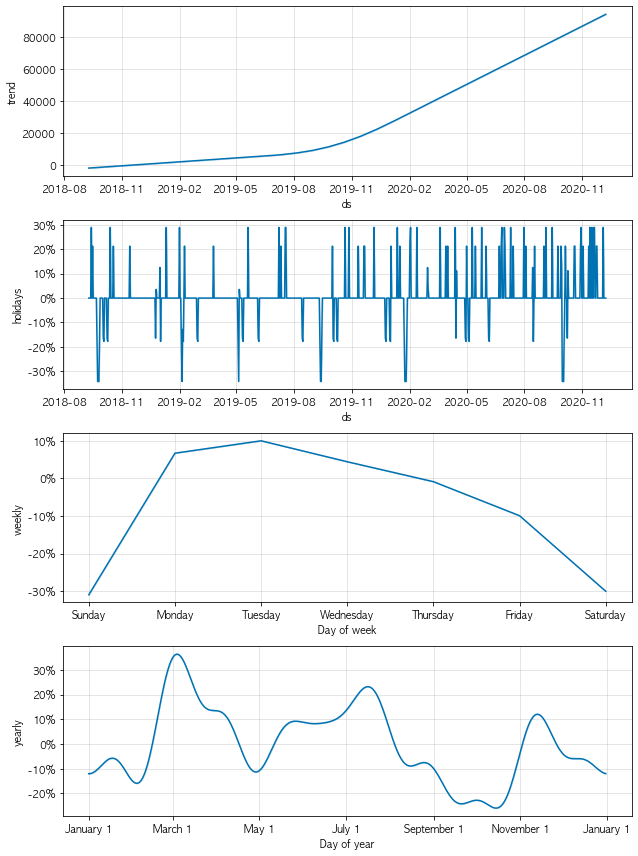

In [412]:
# 최적의 파라미터로 모델학습 및 향후 30일 예측
results = []
sub_pro = pd.DataFrame()

for col in train_old.columns[1:5]:
    df=train_old[['date',col]]
    df=df.rename(columns = {'date': 'ds',col: 'y'})
    my_model = Prophet(changepoint_prior_scale=0.01,
                       seasonality_prior_scale=0.015,
                       holidays = holidays, holidays_prior_scale=3,
                       weekly_seasonality=20, daily_seasonality = False, seasonality_mode='multiplicative')
    my_model.fit(df)
    future_dates = my_model.make_future_dataframe(periods = 30)
    forecast = my_model.predict(future_dates)
    my_model.plot(forecast, ylabel = col)
    sub_pro[col]=forecast['yhat'].tail(n=30).values
    my_model.plot_components(forecast)    # 피팅된 컴포넌트 시각화

In [414]:
# 예측값 훑어보기
sub_pro.head()

,사용자,세션,신규방문자,페이지뷰
0,3961.755151,3825.595214,832.084084,103703.918233
1,4078.921348,3941.963534,880.912663,107502.954450
2,4462.685881,4352.106745,1060.836602,122172.300952
3,3928.015547,3813.843086,821.801253,98975.036747
4,4415.933884,4288.739535,917.255580,116991.709603


### 2) SARIMAX model
- for문 이용하여 최적의 파라미터 탐색
- AIC로 최적값 선정
    - The smallest AIC is 14.0 for model SARIMAX(1, 0, 2)x(1, 1, 2, 12)
- 최적 파라미터로 모델학습 및 향후 30일 예측

In [307]:
# 파라미터 세팅
from itertools import product
p, q = range(1,3), range(1,3)
d = range(0,1)
P, Q = range(1,3), range(1,3)
D = range(1,2)
m = 12
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(product(P, D, Q))]

In [335]:
# for문을 이용한 최적의 파라미터 탐색
# AIC로 최적값 선정
AIC = []
SARIMAX_order = []
for trend_params in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        for col in train_old.columns[1:5]:
                try:
                    result =sm.tsa.SARIMAX(train_old[col], 
                                   order=trend_params, seasonal_order=seasonal_params).fit()
                    print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_params, seasonal_params, result.aic, result.bic, end='\r'))
                    AIC.append(result.aic)
                    SARIMAX_order.append([trend_params, seasonal_params])
                except:
                    continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0],
                                                             SARIMAX_order[AIC.index(min(AIC))][1]))

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=11547.265406867122, BIC=11570.56187646554
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=11570.395634712102, BIC=11593.69210431052
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=9944.41708294582, BIC=9967.713552544237
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=16897.85214871396, BIC=16921.148618312378
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=11549.75862600961, BIC=11577.714389527713
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=11572.407182308216, BIC=11600.362945826319
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=9940.082216224022, BIC=9968.037979742125
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=16884.552902418567, BIC=16912.508665936668
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=11559.000808457671, BIC=11586.956571975774
Fit SARIMA

In [344]:
# 최적의 파라미터로 모델학습 및 향후 30일 예측
sub_sar = pd.DataFrame()
for col in train_old.columns[1:5]:
    mod = sm.tsa.SARIMAX(train_old[col], trend = 'c', order=(1,0,2), seasonal_order=(2,1,1,12))
    results= mod.fit()  
    sub_sar[col]=results.predict(start =  792, end= 821, dynamic= True).values

In [415]:
# 예측값 훑어보기
sub_sar.head()

,사용자,세션,신규방문자,페이지뷰
0,2836.592585,2722.501797,640.159986,56088.779420
1,3298.050069,3231.088842,757.805859,74688.666065
2,3288.650458,3227.144866,741.947543,71757.068558
3,3475.334687,3536.987933,777.311874,76060.870131
4,3412.432024,3490.703917,747.711910,75626.690195


### 4.2.3 Evaluation(Compare) with rmse
- 예측된 값을 바탕으로 모델평가
- 대회평가방식인 rmse 점수 확인
    - Prophet 모형의 경우 2.17
    - Sarimax 모형의 경우 3.53
- Prophet 모형이 훨씬 우수하게 나옴

In [338]:
def dacon_rmse(true, pred):  
    w0 = 1095.214646
    w1 = 1086.728535
    w2 = 268.070707
    w3 = 24236.194444
    score = (np.sqrt(np.mean(np.square(true[:,0] - pred[:,0]))) / w0 + 
               np.sqrt(np.mean(np.square(true[:,1] - pred[:,1]))) / w1 + 
               np.sqrt(np.mean(np.square(true[:,2] - pred[:,2]))) / w2 + 
               np.sqrt(np.mean(np.square(true[:,3] - pred[:,3]))) / w3  )
    return score

In [416]:
# Prophet
dacon_rmse(train_new.values, sub_pro.values)

2.1668952241639383

In [417]:
# Sarimax
dacon_rmse(train_new.values, sub_sar.values)

3.526234953334459

### 4.2.4 Ensemble
- 두 모델의 앙상블을 통해 더 나은 예측력 보여주는지 확인
- 2.19로 Prophet 단독 예측력보다 못함을 확인
    - Prophet 단독 모델로 모델 확정

In [426]:
# 다양한 앙상블 시도를 통해 Prophet 0.8, Sarimax 0.2가 최적해임을 확인
for col in sub.columns[1:]:
    sub[col]=(sub_pro[col] * 0.8 + sub_sar[col] * 0.2)

In [427]:
# 앙상블
dacon_rmse(train_new.values, sub.values)

2.191639675606009

### 4.2.5 Fitting on best model with train data(train_old + train_new)
- train data에 모델 학습 및 향후 30일 예측
- 제출
    - 최종 예측값 : 5.83064 (20등 /453팀)

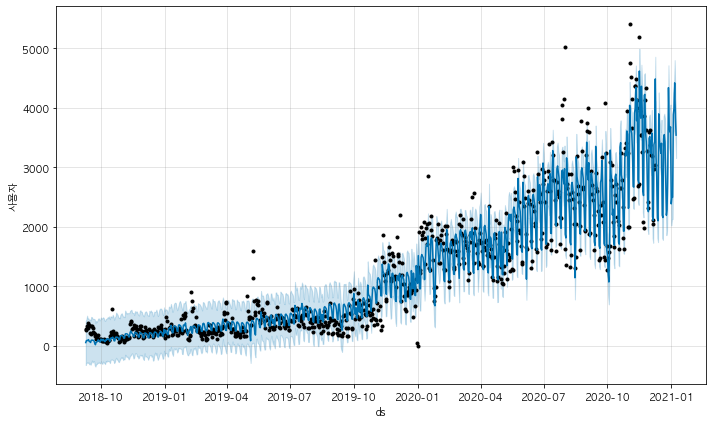

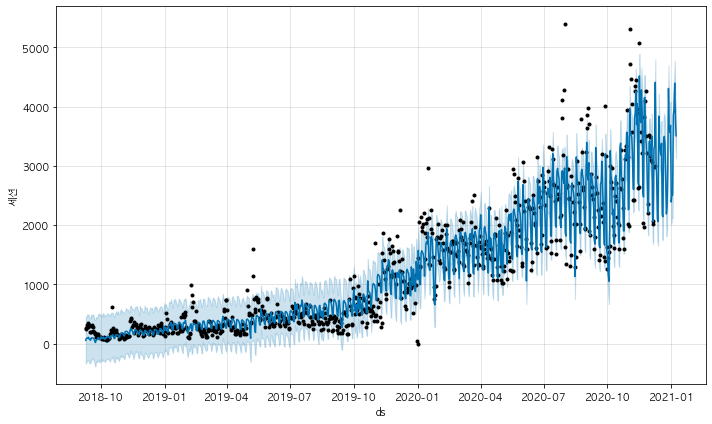

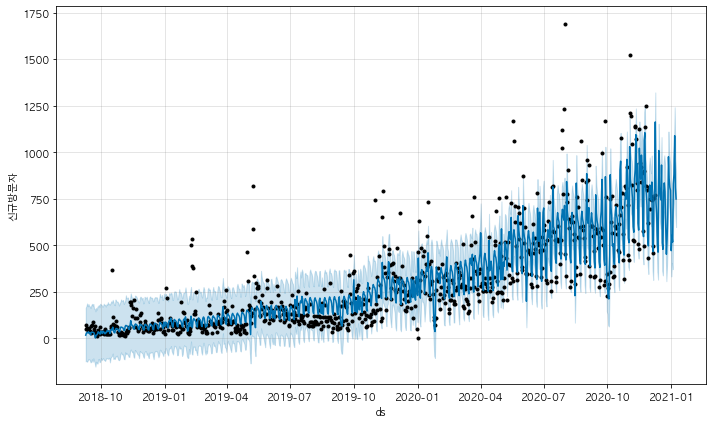

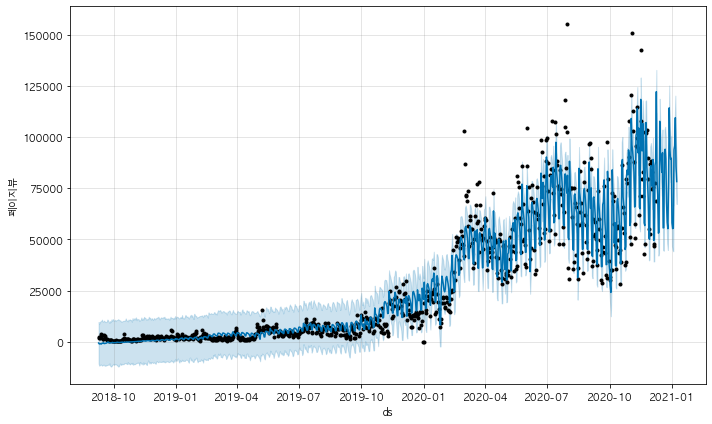

In [444]:
# 최적의 파라미터로 모델학습 및 향후 30일 예측
results = []
sub_final = pd.DataFrame()

for col in train.columns[1:5]:
    df=train[['date',col]]
    df=df.rename(columns = {'date': 'ds',col: 'y'})
    my_model = Prophet(changepoint_prior_scale=0.01,
                       seasonality_prior_scale=0.015,
                       holidays = holidays, holidays_prior_scale=3,
                       weekly_seasonality=20, daily_seasonality = False, seasonality_mode='multiplicative')
    my_model.fit(df)
    future_dates = my_model.make_future_dataframe(periods = 31)
    forecast = my_model.predict(future_dates)
    my_model.plot(forecast, ylabel = col)
    sub_final[col]=forecast['yhat'].tail(n=31).values

In [445]:
# 예측값 확인
sub_final

,사용자,세션,신규방문자,페이지뷰
0,4487.411709,4410.168611,1162.633574,122149.721269
1,3186.190370,3113.757740,731.042100,78989.644043
2,2854.469566,2787.364162,669.881991,71700.615355
3,2146.192816,2101.344798,498.884728,53022.818374
4,2102.063333,2060.802491,463.072999,53551.448095
5,3899.836558,3839.512650,1008.993562,107697.248062
6,3469.323140,3385.647116,813.623631,92339.639372
7,3340.855069,3263.991631,766.251525,88154.690589
8,3236.214076,3181.929154,743.809305,82705.974423
9,3406.023751,3380.322918,931.112373,92318.494633


### 제출

In [446]:
submission['사용자'][30:] = sub_final['사용자']
submission['세션'][30:] = sub_final['세션']
submission['신규방문자'][30:] = sub_final['신규방문자']
submission['페이지뷰'][30:] = sub_final['페이지뷰']

In [447]:
submission

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,0.000000,0.000000,0.000000,0.000000
1,2020-11-10,0.000000,0.000000,0.000000,0.000000
2,2020-11-11,0.000000,0.000000,0.000000,0.000000
3,2020-11-12,0.000000,0.000000,0.000000,0.000000
4,2020-11-13,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
56,2021-01-04,3888.624913,3853.814285,829.743676,93801.600191
57,2021-01-05,3996.773271,3951.425581,882.333962,95690.264334
58,2021-01-06,4421.218722,4395.184991,1088.602659,109432.233287
59,2021-01-07,3840.292365,3807.321694,810.719352,85958.305111


In [448]:
submission.to_csv('sub_final.csv',index=False, encoding = 'euc-kr')    # 최종 예측값 : 5.83064